# Assignment 2 : exercises with linear regression using statsmodels

yg833

Skeleton notebook provided by Dr. Bianco

**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
from matplotlib import pyplot as plt

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf

import numpy as np

%matplotlib inline

In [2]:
# since the function has random in it , decided to seed
np.random.seed(78)

# errors function and the line function provided by Dr. Bianco
def errors(x):
    return np.sqrt(x)
    
def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

## 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars
use the functions created above

In [3]:
## generate a an array of 10 integers between 0 and 100 as rendered in plot from Dr. Bianco
a = 0.75 # slope 3/4 as float
x = np.linspace(0, 100, 10) # exogenuous variable array of evenly spaced integers

y = line(a, x, b = 0, errors=errors)

In [4]:
y # just to see what the y looks like

array([  0.        ,   7.47729001,  16.43794512,  21.27827018,
        25.15898231,  47.10373613,  46.74640248,  53.85663891,
        69.65863018,  83.79623467])

Text(0.5,1,'Exogenuous vs Endogenuous Variables with Error Bars')

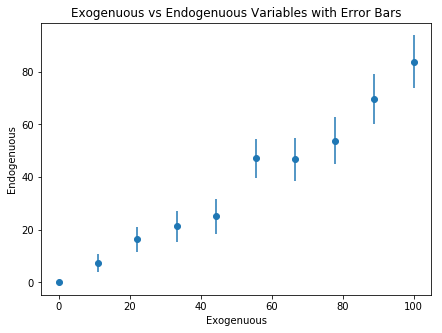

In [5]:
# reference https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html
plt.figure(figsize=(7,5))
plt.errorbar(x, y, yerr=errors(x), fmt = 'o')
plt.xlabel('Exogenuous')
plt.ylabel('Endogenuous')
plt.title('Exogenuous vs Endogenuous Variables with Error Bars')

### Figure 1: Exogenuous vs Endogenuous Variables with Error Bars
This plot was resultant from using the line function with the slope set at 0.75 and intercept at 0.

y = 0.75 * X + 0

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [6]:
## Y
print('y=', y)

y= [  0.           7.47729001  16.43794512  21.27827018  25.15898231
  47.10373613  46.74640248  53.85663891  69.65863018  83.79623467]


In [7]:
# X
print('x=', x)

x= [   0.           11.11111111   22.22222222   33.33333333   44.44444444
   55.55555556   66.66666667   77.77777778   88.88888889  100.        ]


In [8]:
sm.add_constant(x)

array([[   1.        ,    0.        ],
       [   1.        ,   11.11111111],
       [   1.        ,   22.22222222],
       [   1.        ,   33.33333333],
       [   1.        ,   44.44444444],
       [   1.        ,   55.55555556],
       [   1.        ,   66.66666667],
       [   1.        ,   77.77777778],
       [   1.        ,   88.88888889],
       [   1.        ,  100.        ]])

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [9]:
#THE WRONG WAY
smfit_wrong = smf.OLS(y, x).fit()
smfit_wrong.summary()
print(smfit_wrong.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     818.8
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           3.78e-10
Time:                        23:56:00   Log-Likelihood:                -29.731
No. Observations:                  10   AIC:                             61.46
Df Residuals:                       9   BIC:                             61.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7608      0.027     28.615      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [10]:
#THE RIGHT WAY
# referencing: https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

In [11]:
X = sm.add_constant(x) # putting sm.add_constant(x) into 'X' following the tip to do it the right way by passing sm.add_constant(x)

In [12]:
smfit_right = smf.OLS(y, X).fit()
smfit_right.summary()
print(smfit_right.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     268.3
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.94e-07
Time:                        23:56:00   Log-Likelihood:                -29.080
No. Observations:                  10   AIC:                             62.16
Df Residuals:                       8   BIC:                             62.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.0725      2.913     -1.055      0.3

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


# 4. plot the data (as points) and both statsmodels fits

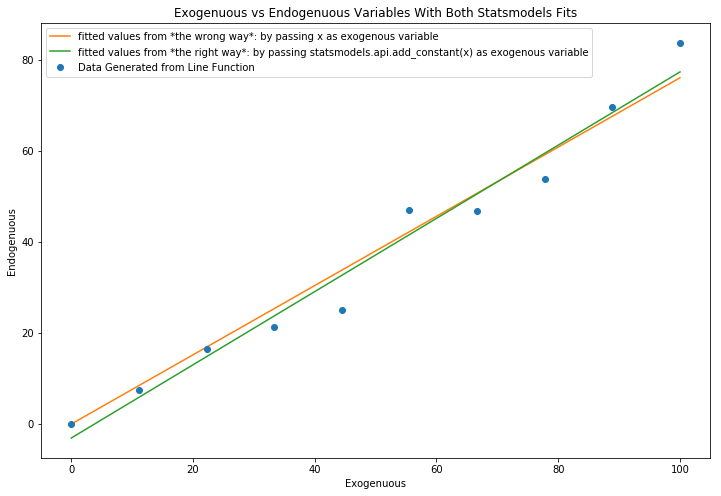

In [13]:
# reference https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html
plt.figure(figsize=(12,8))
plt.errorbar(x, y, fmt = 'o', label="Data Generated from Line Function")
plt.plot(x, smfit_wrong.fittedvalues, label="fitted values from *the wrong way*: by passing x as exogenous variable")
plt.plot(x, smfit_right.fittedvalues, label="fitted values from *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable")
# labels
plt.xlabel('Exogenuous')
plt.ylabel('Endogenuous')
plt.title('Exogenuous vs Endogenuous Variables With Both Statsmodels Fits')
# legend
legend = plt.legend(loc="best")

### Figure 2: Plotting both the wrong and right way of using smf.OLS
The wrong way was passing x directly, vs the right way was passing x through sm.add_constant(x) into smf.OLS()
It seems like the R square values were lowered in the right way than in the wrong. This resembles parts of the reading regarding outliers where around the means the fits are good while further away from the mean at x=0, there are more variances. 

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [14]:
## generate a an array of 10 integers between 0 and 100 as rendered in plot from Dr. Bianco
a2 = 0.625 # slope 6/8 as float
x2 = np.linspace(100, 1000, 50) # exogenuous variable array of evenly spaced integers
y2 = line(a2, x2, b=101, errors=errors)

Text(0.5,1,'Exogenuous vs Endogenuous Variables with Error Bars')

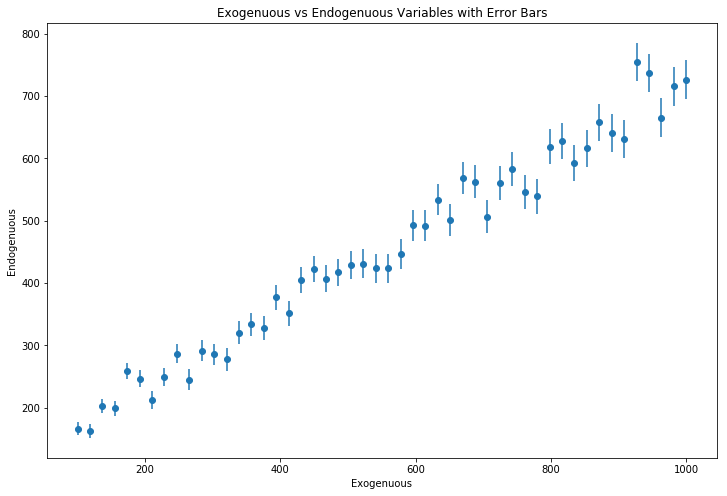

In [15]:
# reference https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html
plt.figure(figsize=(12,8))
plt.errorbar(x2, y2, yerr=errors(x2), fmt = 'o')
plt.xlabel('Exogenuous')
plt.ylabel('Endogenuous')
plt.title('Exogenuous vs Endogenuous Variables with Error Bars')

### Figure 3: Exogenuous vs Endogenuous Variables with Error Bars
This plot was resultant from using the line function with the slope set at 0.625 and intercept at 101.

y = 0.625 * X + 0

# 6. repeat step 3

In [16]:
#THE WRONG WAY
smfit_wrong2 = smf.OLS(y2, x2).fit()
smfit_wrong2.summary()
print(smfit_wrong2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     3704.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           7.87e-48
Time:                        23:56:00   Log-Likelihood:                -271.04
No. Observations:                  50   AIC:                             544.1
Df Residuals:                      49   BIC:                             546.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7790      0.013     60.857      0.0

In [17]:
## The right way
X2 = sm.add_constant(x2)
smfit_right2 = smf.OLS(y2, X2).fit()
smfit_right2.summary()
print(smfit_right2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1904.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.77e-40
Time:                        23:56:00   Log-Likelihood:                -233.64
No. Observations:                  50   AIC:                             471.3
Df Residuals:                      48   BIC:                             475.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        110.9978      8.608     12.895      0.0

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [18]:
w = (1/errors(x2)) # taking the inverse of errors using the errors function
# reference: https://www.statsmodels.org/stable/examples/notebooks/generated/wls.html
sm_wls = sm.WLS(y2, X2, weights=w)
res_wls = sm_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            WLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2210.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           8.43e-42
Time:                        23:56:00   Log-Likelihood:                -231.75
No. Observations:                  50   AIC:                             467.5
Df Residuals:                      48   BIC:                             471.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        110.1632      7.067     15.587      0.0

In [19]:
## the WLS Regression results show better fit.

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

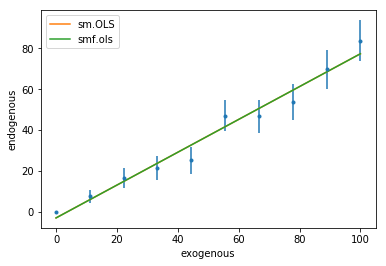

In [20]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
plt.errorbar(x, y, yerr=errors(x), fmt='.')
plt.plot(x, smfit_right.fittedvalues, '-', label="sm.OLS")
plt.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
plt.xlabel("exogenous")
plt.ylabel("endogenous")
plt.legend();